In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
df = pd.read_csv('nobel.csv')
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [10]:
df.columns


Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [14]:
df.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(0)

In [ ]:
What is the most commonly awarded gender and birth country?

In [19]:
top_gender = df['sex'].mode()[0]
top_country =  df['birth_country'].mode()[0]
print(top_gender)
print(top_country)

Male
United States of America


In [ ]:
Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [29]:
df['US_born'] = df['birth_country'] == 'United States of America'
df['decade'] = (df['year'] // 10 )* 10

decade_count = df.groupby('decade').agg(
    total_winners = ('birth_country', 'count' ),
    US_winners = ('US_born', 'sum' )
)
decade_count['ratio'] = decade_count['total_winners'] / decade_count['US_winners']
max_decade_usa = decade_count['ratio'].idxmax()

print(max_decade_usa)

1900


In [44]:
df['US_born'] = df['birth_country'] == 'United States of America'

grouped1 = df.groupby('decade', as_index=False)['US_born'].mean()
grouped1
max_decade1 = df['decade'].mode()[0]
max_decade1 = grouped1.loc[grouped1['US_born'].idxmax(), 'decade']

# Extract one row with the maximum ratio from the original DataFrame for that decade
max_ratio = grouped1[grouped1['decade'] == max_decade1].iloc[0]
print(grouped1)
print(max_decade1)
print(max_ratio)


    decade   US_born
0     1900  0.017544
1     1910  0.075000
2     1920  0.074074
3     1930  0.250000
4     1940  0.302326
5     1950  0.291667
6     1960  0.265823
7     1970  0.317308
8     1980  0.319588
9     1990  0.403846
10    2000  0.422764
11    2010  0.314050
12    2020  0.360000
2000
decade     2000.000000
US_born       0.422764
Name: 10, dtype: float64


In [ ]:
Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [33]:
df['female_winner'] = df['sex'] == 'Female'

grouped = df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
grouped

,decade,category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
67,2020,Economics,0.111111
68,2020,Literature,0.500000
69,2020,Medicine,0.125000
70,2020,Peace,0.285714


In [35]:
max_decade = df['decade'].mode()[0]
max_cat = df['category'].mode()[0]

print(max_decade)
print(max_cat)

2000
Medicine


In [34]:
highest_count = df.agg(
    total_winners = ('decade', 'max' ),
    US_winners = ('category', 'max' )
)

highest_count

,decade,category
total_winners,2020.0,NaN
US_winners,NaN,Physics


In [ ]:
Who was the first woman to receive a Nobel Prize, and in what category?

In [59]:
first_woman = df[df['female_winner']]
min_row = first_woman[first_woman['year'] == first_woman['year'].min()]
print('The first woman to recieve Nobel Prize was', min_row['full_name'], 'under', min_row['category'])

The first woman to recieve Nobel Prize was 19    Marie Curie, née Sklodowska
Name: full_name, dtype: object under 19    Physics
Name: category, dtype: object


In [ ]:
Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [60]:
win_count = df['full_name'].value_counts()
win_count = win_count[win_count >= 2].index
win_count = list(win_count)
print(win_count)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


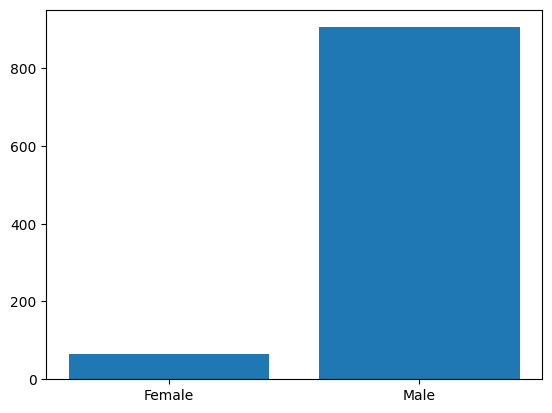

In [25]:
fig, ax = plt.subplots()

# Use groupby to count the number of prizes for each sex
prize_counts = df.groupby('sex')['prize'].count()

# Plot the bar chart
ax.bar(prize_counts.index, prize_counts.values)

# Display the plot
plt.show

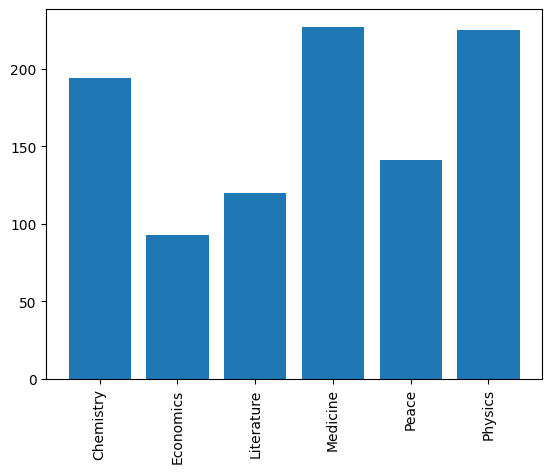

In [45]:
fig, ax = plt.subplots()
prize_count_per_country = df.groupby('category')['prize'].count()

ax.bar(prize_count_per_country.index, prize_count_per_country.values)

ax.set_xticks(range(len(prize_count_per_country.index)))  # Set tick positions
ax.set_xticklabels(prize_count_per_country.index, rotation=90)

plt.show()